In [10]:
# [과제 1]데이터를 불러오는 것부터 데이터 탐색까지 파이썬으로 진행해야 하는 플로우를 문서로 작성한다.  
# 체크리스트
# 1. 각 목차에 필요한 함수는?
# 2. 각 목차에서 주의해야할 점은 무엇인가? (EX. EncodeDecodeError 등)
# 3. 데이터 탐색 - 왜 해야 하는가?
# 4. 데이터 탐색 시 필요한 함수는?

# [과제 2]텍스트 데이터 분석 방법들과 그 과정을 문서로 작성한다. 
# 체크리스트
# 1. 텍스트 데이터 분석이 힘든 이유?
# 2. 텍스트 데이터 분석 방법(과정 중심, 데이터 형태)
# 3. 각각 방법마다 필요한 함수는? 
# 4. 그 함수를 사용하려면 뭘 입력해야 하는가?
# 5. 시각화 해석은 어떻게 할까?

# 0. 환경 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
print(pd.__version__)

3.0.0


# 1. 데이터 불러오기

In [2]:

df = pd.read_csv(
    "./data/jobs_merged_0129.csv"
)
df


,url,title,company,location,scrape_date,scrape_time
0,https://in.indeed.com/viewjob?jk=8a6bb0507eba5bbf,Data Engineer/ETL Developer,Princeton IT America,"KA, IN",2025-07-16,12:23:55
1,https://www.linkedin.com/jobs/view/4265959832,2702- Data Engineer,EXL,"Pune, Maharashtra, India",2025-07-16,12:23:55
2,https://www.linkedin.com/jobs/view/4267652354,Data Engineer,SatSure,"Bangalore Urban, Karnataka, India",2025-07-16,12:23:55
3,https://www.linkedin.com/jobs/view/4267647369,DevOps/Cloud Engineer,BayOne Solutions,"Bengaluru, Karnataka, India",2025-07-16,12:23:55
4,https://www.linkedin.com/jobs/view/4265960423,AI Developer – Immediate Joiners Only,Perimattic,"Mumbai, Maharashtra, India",2025-07-16,12:23:55
...,...,...,...,...,...,...
2227,https://www.linkedin.com/jobs/view/4309720429,Data Scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2228,https://www.linkedin.com/jobs/view/4309719532,Data Scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2229,https://www.linkedin.com/jobs/view/4309701623,Data Scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2230,https://www.linkedin.com/jobs/view/4309703481,Senior AI Developer - Bangalore,SAP,"Bengaluru, Karnataka, India",2025-10-06,10:23:15


# 2. 데이터 전처리하기

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          2232 non-null   object
 1   title        2232 non-null   object
 2   company      2231 non-null   object
 3   location     1798 non-null   object
 4   scrape_date  2232 non-null   object
 5   scrape_time  2232 non-null   object
dtypes: object(6)
memory usage: 104.8+ KB


In [3]:
# location 컬럼의 NaN을 None(또는 빈 문자열 '')으로 미리 채웁니다.
data = df.fillna('None')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          2232 non-null   object
 1   title        2232 non-null   object
 2   company      2232 non-null   object
 3   location     2232 non-null   object
 4   scrape_date  2232 non-null   object
 5   scrape_time  2232 non-null   object
dtypes: object(6)
memory usage: 104.8+ KB


In [4]:
def align_location(row):
    row_str = str(row).strip()
    
    # 결과값이 'None'이라는 "글자"가 되도록 수정
    if row_str.lower() in ['none', 'nan', '']:
        return pd.Series(['None', 'None', 'None'])
    
    parts = [p.strip() for p in row_str.split(',')]
    
    if len(parts) >= 3:
        return pd.Series([", ".join(parts[:-2]), parts[-2], parts[-1]])
    elif len(parts) == 2:
        # City 자리에 문자열 'None' 배정
        return pd.Series(['None', parts[0], parts[1]])
    elif len(parts) == 1:
        return pd.Series(['None', 'None', parts[0]])
    
    return pd.Series(['None', 'None', 'None'])

# 적용
df[['city', 'state', 'country']] = df['location'].apply(align_location)

## 2-1) 데이터 정보 확인하기

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          2232 non-null   object
 1   title        2232 non-null   object
 2   company      2231 non-null   object
 3   location     1798 non-null   object
 4   scrape_date  2232 non-null   object
 5   scrape_time  2232 non-null   object
 6   city         2232 non-null   object
 7   state        2232 non-null   object
 8   country      2232 non-null   object
dtypes: object(9)
memory usage: 157.1+ KB


In [8]:
df["company"]

0         Princeton IT America
1                          EXL
2                      SatSure
3             BayOne Solutions
4                   Perimattic
                 ...          
2227    People Prime Worldwide
2228    People Prime Worldwide
2229    People Prime Worldwide
2230                       SAP
2231    People Prime Worldwide
Name: company, Length: 2232, dtype: object

In [5]:
pd.set_option('display.max_columns', None)

In [9]:
df.describe()

,url,title,company,location,scrape_date,scrape_time,city,state,country
count,2232,2232,2231,1798,2232,2232,2232,2232,2232
unique,2129,758,967,106,26,600,73,46,4
top,https://www.linkedin.com/jobs/view/4307968830,Remote Python AI Engineer - 17852,Turing,"Bengaluru, Karnataka, India",2025-07-16,13:55:55,None,Karnataka,India
freq,10,149,284,434,298,31,742,556,1567


In [29]:
df.describe(include="object")

,url,title,company,location,scrape_date,scrape_time
count,2232,2232,2231,1798,2232,2232
unique,2129,758,967,106,26,600
top,https://www.linkedin.com/jobs/view/4307968830,Remote Python AI Engineer - 17852,Turing,"Bengaluru, Karnataka, India",2025-07-16,13:55:55
freq,10,149,284,434,298,31


In [8]:
def check_job_data_viability(url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code != 200:
            return False
            
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # 1. 타이틀 존재 여부 확인 (가장 기본)
        # <h1>이 없거나 텍스트가 너무 짧으면 공고가 아니라고 판단
        title_tag = soup.find('h1')
        title_text = title_tag.get_text(strip=True) if title_tag else ""
        
        # 2. 본문 내용 확인 (수집할 Skill, Level 정보가 들어있을 공간)
        # 보통 채용 공고는 설명글이 최소 300자 이상입니다.
        description_text = soup.get_text()
        
        # [구별 로직]
        # 직무 타이틀이 있고, 본문 내용이 충분히(예: 500자 이상) 있다면 수집 가능으로 판단
        if len(title_text) > 2 and len(description_text) > 500:
            # 추가 검사: 마감 문구가 없는지 확인
            if "no longer accepting" in description_text.lower():
                return False
            return True
        
        return False
        
    except:
        return False

In [9]:
# Indeed 링크만 뽑기
indeed_df = df[df['url'].str.contains('indeed', na=False)]

# LinkedIn 링크만 뽑기
linkedin_df = df[df['url'].str.contains('linkedin', na=False)]

print(f"Indeed 공고 수: {len(indeed_df)}")
print(f"LinkedIn 공고 수: {len(linkedin_df)}")

Indeed 공고 수: 230
LinkedIn 공고 수: 2002


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def check_viability_by_domain(url):
    if pd.isna(url) or url == 'None' or url == '':
        return False
    
    try:
        # 차단 방지를 위해 일반적인 브라우저 헤더 추가
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
        response = requests.get(url, headers=headers, timeout=10)
        
        if response.status_code != 200:
            return False
            
        soup = BeautifulSoup(response.text, 'html.parser')
        text_content = soup.get_text().lower()

        if 'linkedin.com' in url:
            if "no longer accepting" in text_content:
                return False
            return soup.find('h1') is not None

        elif 'indeed.com' in url:
            if "job expired" in text_content or "not found" in text_content:
                return False
            return soup.find('h1') is not None

        else:
            return len(text_content) > 500

    except Exception:
        return False

In [14]:
# 샘플 데이터 추출 및 테스트
# na=False를 넣어 에러를 방지합니다.
sample_indeed = df[df['url'].str.contains('indeed', na=False)]['url'].iloc[0]
sample_linkedin = df[df['url'].str.contains('linkedin', na=False)]['url'].iloc[0]

print("--- 샘플 테스트 진행 중 ---")
res_indeed = check_viability_by_domain(sample_indeed)
res_linkedin = check_viability_by_domain(sample_linkedin)

print(f"Indeed 결과: {res_indeed}")
print(f"LinkedIn 결과: {res_linkedin}")

--- 샘플 테스트 진행 중 ---
Indeed 결과: False
LinkedIn 결과: True


In [15]:
# Indeed 샘플 하나만 집중 분석
sample_indeed_url = df[df['url'].str.contains('indeed', na=False)]['url'].iloc[0]

def debug_indeed(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'
    }
    try:
        response = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        print(f"HTTP 상태 코드: {response.status_code}")
        print("-" * 30)
        print("페이지 텍스트 앞부분 (500자):")
        print(soup.get_text()[:500].strip())
        print("-" * 30)
        
        # h1이 정말 없는지 확인
        h1 = soup.find('h1')
        print(f"h1 태그 발견 여부: {h1 is not None}")
        if h1: print(f"h1 내용: {h1.get_text()}")
        
    except Exception as e:
        print(f"에러 발생: {e}")

debug_indeed(sample_indeed_url)

HTTP 상태 코드: 403
------------------------------
페이지 텍스트 앞부분 (500자):
Find jobs   Company Reviews   Find salaries    Sign in       Upload your resume   Sign in   Employers / Post Job   Find jobs   Company Reviews   Find salaries      Additional Verification Required  Enable JavaScript and cookies to continue Return home   → Troubleshooting Cloudflare Errors Need more help? Contact us
------------------------------
h1 태그 발견 여부: True
h1 내용: Additional Verification Required


In [16]:
def check_viability_with_block_detect(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/110.0.0.0 Safari/537.36'}
    try:
        response = requests.get(url, headers=headers, timeout=10)
        
        # Cloudflare에 걸린 경우
        if response.status_code == 403 or "cloudflare" in response.text.lower():
            return "Blocked/Verification Required"
            
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # LinkedIn 통과 로직 (이미 성공 확인됨)
        if 'linkedin.com' in url:
            if "no longer accepting" in soup.get_text().lower():
                return "Closed"
            return "Exist" if soup.find('h1') else "No Title"

        # Indeed가 운 좋게 200 OK를 줬을 경우
        elif 'indeed.com' in url:
            if "job expired" in soup.get_text().lower():
                return "Closed"
            return "Exist" if soup.find('h1') else "No Title"

        return "Unknown"
    except:
        return "Error/Timeout"

# 샘플 재테스트
print(f"Indeed 결과: {check_viability_with_block_detect(sample_indeed_url)}")

Indeed 결과: Blocked/Verification Required


In [18]:
import time
import random
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

def stable_check(url):
    if 'indeed.com' in url:
        return "Blocked (Indeed)"
    
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/110.0.0.0 Safari/537.36'}
    
    # 최대 3번까지 재시도
    for attempt in range(3):
        try:
            # 서버를 속이기 위한 랜덤한 휴식 (0.5초 ~ 1.5초)
            time.sleep(random.uniform(0.5, 1.5))
            
            response = requests.get(url, headers=headers, timeout=10)
            
            if response.status_code == 200:
                text = response.text.lower()
                if "no longer accepting" in text: return "Closed"
                return "Exist" if "h1" in text else "No Title"
            
            elif response.status_code == 429:
                # 429 에러 시 더 오래 대기 후 재시도
                wait_time = (attempt + 1) * 5
                time.sleep(wait_time)
                continue
                
            return f"Error ({response.status_code})"
            
        except:
            time.sleep(2)
            continue
            
    return "Timeout/Error"

# [핵심] 쓰레드 수를 5개 이하로 줄여서 천천히 보냅니다.
urls = df['url'].tolist()
with ThreadPoolExecutor(max_workers=5) as executor:
    df['exist_status'] = list(tqdm(executor.map(stable_check, urls), total=len(urls)))

100%|██████████| 2232/2232 [1:01:31<00:00,  1.65s/it]  


In [35]:
df["exist_status"].value_counts()

exist_status
Exist               1776
Blocked (Indeed)     230
Error (404)          104
Closed               102
Timeout/Error         20
Name: count, dtype: int64

In [26]:
print(df["exist_status"].values)


['Blocked (Indeed)' 'Exist' 'Exist' ... 'Exist' 'Exist' 'Exist']


In [29]:
df["exist_status"].__contains__("Exist")

False

In [37]:
exist_rows = df[df['exist_status'] == "Exist"]
print(f"존재 건수: {exist_rows}")

존재 건수:                                                 url  \
1     https://www.linkedin.com/jobs/view/4265959832   
2     https://www.linkedin.com/jobs/view/4267652354   
3     https://www.linkedin.com/jobs/view/4267647369   
4     https://www.linkedin.com/jobs/view/4265960423   
5     https://www.linkedin.com/jobs/view/4267649182   
...                                             ...   
2227  https://www.linkedin.com/jobs/view/4309720429   
2228  https://www.linkedin.com/jobs/view/4309719532   
2229  https://www.linkedin.com/jobs/view/4309701623   
2230  https://www.linkedin.com/jobs/view/4309703481   
2231  https://www.linkedin.com/jobs/view/4309718555   

                                      title                 company  \
1                       2702- Data Engineer                     EXL   
2                             Data Engineer                 SatSure   
3                     DevOps/Cloud Engineer        BayOne Solutions   
4     AI Developer – Immediate Joiners Only     

In [36]:
error_rows = df[df['exist_status'] == "Timeout/Error"]
print(f"에러 발생 건수: {error_rows}")

에러 발생 건수:                                                 url  \
49    https://www.linkedin.com/jobs/view/4267655980   
186   https://www.linkedin.com/jobs/view/4265992400   
325   https://www.linkedin.com/jobs/view/4266934948   
542   https://www.linkedin.com/jobs/view/4268718547   
646   https://www.linkedin.com/jobs/view/4270437429   
746   https://www.linkedin.com/jobs/view/4302884599   
854   https://www.linkedin.com/jobs/view/4302785762   
906   https://www.linkedin.com/jobs/view/4257182328   
1044  https://www.linkedin.com/jobs/view/4304161032   
1047  https://www.linkedin.com/jobs/view/4304142990   
1083  https://www.linkedin.com/jobs/view/4304611493   
1134  https://www.linkedin.com/jobs/view/4304020956   
1434  https://www.linkedin.com/jobs/view/4306467707   
1574  https://www.linkedin.com/jobs/view/4305329702   
1633  https://www.linkedin.com/jobs/view/4308046019   
1782  https://www.linkedin.com/jobs/view/4306530506   
1800  https://www.linkedin.com/jobs/view/4308993936   


In [40]:
close_rows = df[df['exist_status'] == "Closed"]
print(f"채용 마감 건수: {close_rows}")

채용 마감 건수:                                                 url  \
16    https://www.linkedin.com/jobs/view/4265957121   
74    https://www.linkedin.com/jobs/view/4267656919   
76    https://www.linkedin.com/jobs/view/4267660365   
88    https://www.linkedin.com/jobs/view/4267667352   
95    https://www.linkedin.com/jobs/view/4267668395   
...                                             ...   
2167  https://www.linkedin.com/jobs/view/4308356816   
2175  https://www.linkedin.com/jobs/view/4310629261   
2182  https://www.linkedin.com/jobs/view/4310678136   
2183  https://www.linkedin.com/jobs/view/4310678354   
2224  https://www.linkedin.com/jobs/view/4308719932   

                                         title  \
16                Senior DevOps Engineer – GCP   
74        AI Specialist – AI Agent Development   
76                              Cloud Engineer   
88    AI Engineer – Autonomous Agent Developer   
95                   Gen AI Engineer+.Net Core   
...                          

In [ ]:
import time
import random
from tqdm import tqdm

results = []

print("순차적 URL 체크 시작 (안전 모드)...")

# iterrows를 사용하여 하나씩 확실하게 처리
for index, row in tqdm(df.iterrows(), total=len(df)):
    url = row['url']
    
    # 1. Indeed는 어차피 안 되니 바로 패스
    if 'indeed.com' in str(url):
        results.append("Blocked (Indeed)")
        continue
    
    # 2. LinkedIn 및 기타 사이트 처리
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/110.0.0.0 Safari/537.36'}
        # 랜덤 지연을 주어 사람처럼 행동 (0.3 ~ 0.8초)
        time.sleep(random.uniform(0.3, 0.8))
        
        response = requests.get(url, headers=headers, timeout=10)
        
        if response.status_code == 200:
            text = response.text.lower()
            if "no longer accepting" in text:
                results.append("Closed")
            elif "h1" in text:
                results.append("Exist")
            else:
                results.append("No Title")
        else:
            results.append(f"Error ({response.status_code})")
            
    except Exception as e:
        results.append("Timeout/Error")

# 최종 결과 저장
df['exist_status'] = results
print(df['exist_status'].value_counts())

In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
# [핵심] 9222 포트로 열려 있는 브라우저에 접속하겠다는 설정
options.add_experimental_option("debuggerAddress", "127.0.0.1:9222")

# 이제 새 창을 띄우는 게 아니라 기존 창을 잡습니다.
driver = webdriver.Chrome(options=options)

# 3. 테스트: 이제 URL 이동이 될 겁니다!
target_url = "https://www.linkedin.com/jobs/view/4267655980"
driver.get(target_url)

print("현재 페이지 제목:", driver.title)

현재 페이지 제목: Senior DevOps Engineer | CG-VAK Software & Exports Ltd. | LinkedIn


In [52]:
from selenium.webdriver.common.by import By
import time
import random

def collect_with_user_selectors(driver, url):
    driver.get(url)
    time.sleep(random.uniform(5, 7)) # 로딩 시간을 충분히 줍니다.

    try:
        # 1. 더보기 버튼 클릭 (이걸 눌러야 '채용공고 정보'가 확장됨)
        # 보내주신 더보기 SELECTOR 적용
        more_btn_selector = "#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._84ec64af > div:nth-child(3) > div > div > div > div > div > div > p:nth-child(3) > span > button"
        
        try:
            more_btn = driver.find_element(By.CSS_SELECTOR, more_btn_selector)
            driver.execute_script("arguments[0].click();", more_btn)
            time.sleep(1.5)
            print("✅ 더보기 버튼 클릭 성공")
        except:
            print("⚠️ 더보기 버튼을 찾을 수 없거나 이미 확장됨")

        # 2. 각 항목 수집 (사용자님이 찾으신 SELECTOR 그대로 대입)
        results = {
            '회사명': driver.find_element(By.CSS_SELECTOR, "#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._39dfa905 > div > div > div.b5d06882 > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._45232ba5 > div.f00f2910.bbf46644.dc1dbfb7._4fe97c09._949bca74._39dfa905 > a > div > p > a").text.strip(),
            
            '포지션': driver.find_element(By.CSS_SELECTOR, "#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._39dfa905 > div > div > div.b5d06882 > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._45232ba5 > div.f00f2910.bbf46644._616f5abe._4fe97c09._949bca74._39dfa905 > div > p").text.strip(),
            
            '국가': driver.find_element(By.CSS_SELECTOR, "#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._39dfa905 > div > div > div.b5d06882 > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._45232ba5 > p > span:nth-child(1)").text.strip(),
            
            '지원자수': driver.find_element(By.CSS_SELECTOR, "#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._39dfa905 > div > div > div.b5d06882 > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._45232ba5 > p > span:nth-child(7)").text.strip(),
            
            '채용공고정보': driver.find_element(By.CSS_SELECTOR, "#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._84ec64af > div:nth-child(3) > div > div > div > div > div > div").text.strip()
        }
        return results

    except Exception as e:
        print(f"❌ 수집 에러: {e}")
        return None

# 실행
print(collect_with_user_selectors(driver, "https://www.linkedin.com/jobs/view/4267655980"))

✅ 더보기 버튼 클릭 성공
{'회사명': 'CG-VAK Software & Exports Ltd.', '포지션': 'Senior DevOps Engineer', '국가': 'Coimbatore, Tamil Nadu, India', '지원자수': '25 applicants', '채용공고정보': 'About the job\nGood exposure on Agile Methodology in designing and implementation of\nContinuous Integration and Delivery (CI/CD).\n• Strong understanding of DevOps Principles and Practices.\n• Led the Migration of On-Premises Infrastructure to Cloud, Cloud Migrations\nresulting reduction in operational costs and improved scalability.\n• Good understanding of AWS Services like EC2, S3, IAM, RDS, Secret Manager\nServer, API Gateway, Docker, Kubernetes Services and Monitoring Tools.\n• Expertise in Terraform, Cloud Formation Templates and Bash and Python\nScripting for automation of technical activities in AWS.\n• Expertise in Build and Release deployments.\n• Experience on Code Quality Analysis using SonarQube.\n• Good understanding of programming languages like Java, Python and YAML.\n• Collaborated with cross-functional te

In [9]:
import pandas as pd
import time
import random
from tqdm import tqdm
from selenium.webdriver.common.by import By

# 1. 새 컬럼 초기화
new_columns = ['crl_company_nm', 'crl_position', 'crl_country', 'crl_napply', 
               'crl_work_type', 'crl_emp_type', 'crl_jd', 'crl_requirement']

for col in new_columns:
    if col not in df.columns:
        df[col] = None

# 2. 안전한 데이터 추출 함수
def safe_get(selector):
    try:
        element = driver.find_element(By.CSS_SELECTOR, selector)
        return element.text.strip()
    except:
        return ""

# 3. 10개 테스트 진행
test_indices = df.index[:10]
output_test_file = "jobs_test_10_samples_final.csv"

print("🚀 SyntaxError 수정 완료! 10개 수집을 시작합니다...")

for idx in tqdm(test_indices):
    url = df.at[idx, 'url']
    try:
        driver.get(url)
        time.sleep(random.uniform(5, 7)) 
        
        # 더보기 버튼 클릭 (유연한 셀렉터)
        try:
            more_btn = driver.find_element(By.CSS_SELECTOR, "button[aria-label*='show more'], .jobs-description__footer-button")
            driver.execute_script("arguments[0].click();", more_btn)
            time.sleep(1)
        except:
            driver.execute_script("window.scrollTo(0, 500);")
            time.sleep(1)

        # 각 항목 데이터 매칭 (긴 셀렉터들을 안전하게 감쌌습니다)
        df.at[idx, 'crl_company_nm'] = safe_get("#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._39dfa905 > div > div > div.b5d06882 > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._45232ba5 > div.f00f2910.bbf46644.dc1dbfb7._4fe97c09._949bca74._39dfa905 > a > div > p > a")
        
        df.at[idx, 'crl_position'] = safe_get("#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._39dfa905 > div > div > div.b5d06882 > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._45232ba5 > div.f00f2910.bbf46644._616f5abe._4fe97c09._949bca74._39dfa905 > div > p")
        
        df.at[idx, 'crl_country'] = safe_get("#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._39dfa905 > div > div > div.b5d06882 > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._45232ba5 > p > span:nth-child(1)")
        
        df.at[idx, 'crl_napply'] = safe_get("#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._39dfa905 > div > div > div.b5d06882 > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._45232ba5 > p > span:nth-child(7)")
        
        df.at[idx, 'crl_work_type'] = safe_get("#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._39dfa905 > div > div > div.b5d06882 > div > div.f00f2910.bbf46644._616f5abe.c77e551a.ce992032.eee86998 > div:nth-child(1) > button > span > span")
        
        df.at[idx, 'crl_emp_type'] = safe_get("#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._39dfa905 > div > div > div.b5d06882 > div > div.f00f2910.bbf46644._616f5abe.c77e551a.ce992032.eee86998 > div:nth-child(2) > button > span > span")

        # JD 수집 (백업 로직 포함)
        jd_selector = "#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._84ec64af > div:nth-child(3) > div > div > div > div > div > div > p:nth-child(3) > span"
        jd_content = safe_get(jd_selector)
        if len(jd_content) < 50: 
            jd_content = safe_get("#job-details, .jobs-description__content")
        df.at[idx, 'crl_jd'] = jd_content

        # 요구사항 수집
        req_selector = "#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._84ec64af > div:nth-child(3) > div > div > div > div > div > div > p:nth-child(6)"
        df.at[idx, 'crl_requirement'] = safe_get(req_selector)

    except Exception as e:
        print(f"⚠️ Index {idx} 에러: {e}")

# 결과 저장
df.iloc[:10].to_csv(output_test_file, index=False, encoding='utf-8-sig')
print(f"✅ 테스트 완료! '{output_test_file}' 파일을 확인해 보세요.")

🚀 SyntaxError 수정 완료! 10개 수집을 시작합니다...


100%|██████████| 10/10 [01:19<00:00,  7.93s/it]

✅ 테스트 완료! 'jobs_test_10_samples_final.csv' 파일을 확인해 보세요.


In [7]:
import pandas as pd
import time
import random
from tqdm import tqdm
from selenium.webdriver.common.by import By

# 1. 새 컬럼 초기화
new_columns = ['crl_company_nm', 'crl_position', 'crl_country', 'crl_napply', 
               'crl_work_type', 'crl_emp_type', 'crl_jd', 'crl_requirement']
for col in new_columns:
    if col not in df.columns: df[col] = None

def safe_get(selector):
    try:
        return driver.find_element(By.CSS_SELECTOR, selector).text.strip()
    except:
        return ""

# 3. 테스트 진행
test_indices = df.index[:10]
output_test_file = "jobs_test_result_scrolled.csv"

print("🚀 스크롤 및 더보기 로직을 풀가동하여 수집을 시작합니다...")

for idx in tqdm(test_indices):
    url = df.at[idx, 'url']
    if "indeed.com" in url: continue
        
    try:
        driver.get(url)
        time.sleep(random.uniform(4, 5)) # 초기 로딩 대기

        # [핵심] 스크롤 로직 복구 및 강화
        # 1단계: 페이지 중간 지점까지 스크롤하여 JD 로딩 유도
        driver.execute_script("window.scrollTo(0, 800);")
        time.sleep(1.5)

        # 2단계: '더보기' 버튼 찾아서 클릭
        try:
            more_btn = driver.find_element(By.CSS_SELECTOR, "button[aria-label*='show more'], .jobs-description__footer-button")
            driver.execute_script("arguments[0].click();", more_btn)
            time.sleep(1.5) # 더보기 클릭 후 내용 확장 대기
        except:
            # 버튼이 없는 경우를 대비해 조금 더 아래로 스크롤
            driver.execute_script("window.scrollTo(0, 1200);")
            time.sleep(1)

        # --- 데이터 수집 ---
        df.at[idx, 'crl_position'] = safe_get("h1.t-24")
        df.at[idx, 'crl_company_nm'] = safe_get(".job-details-jobs-breadcrumb__container a")
        
        # JD 수집 (우선순위 기반)
        jd_selectors = ["#job-details", ".jobs-description__content", ".jobs-box__html-content"]
        final_jd = ""
        for s in jd_selectors:
            content = safe_get(s)
            if len(content) > 100:
                final_jd = content
                break
        
        df.at[idx, 'crl_jd'] = final_jd
        # 만약 특정 requirement 위치를 고수하고 싶다면 여기에 다시 추가 가능합니다.
        df.at[idx, 'crl_requirement'] = safe_get("#workspace > div > div > div.bbb811b2.c27ad205.b1f1d4b1 > div > div > div > div.c07bae8d.f00f2910._85ca723a._616f5abe.c77e551a._949bca74._84ec64af > div:nth-child(3) > div > div > div > div > div > div > p:nth-child(6)")

    except Exception as e:
        print(f"⚠️ Index {idx} 오류: {e}")

# 저장
df.iloc[:10].to_csv(output_test_file, index=False, encoding='utf-8-sig')
print(f"✅ 스크롤 보정 완료! '{output_test_file}'를 확인해 보세요.")

🚀 스크롤 및 더보기 로직을 풀가동하여 수집을 시작합니다...


100%|██████████| 10/10 [01:03<00:00,  6.36s/it]

✅ 스크롤 보정 완료! 'jobs_test_result_scrolled.csv'를 확인해 보세요.


In [ ]:
import pandas as pd
import time
import random
from tqdm import tqdm
from selenium.webdriver.common.by import By

# 1. 새 컬럼 초기화
new_columns = ['crl_company_nm', 'crl_position', 'crl_country', 'crl_napply', 
               'crl_work_type', 'crl_emp_type', 'crl_jd', 'crl_requirement']
for col in new_columns:
    if col not in df.columns: df[col] = None

def safe_get(selector):
    try:
        return driver.find_element(By.CSS_SELECTOR, selector).text.strip()
    except:
        return ""

# 3. 10개 테스트 진행
test_indices = df.index[:10]
output_test_file = "jobs_test_result_fixed_v4.csv"

print("🔍 태그 구조 변화를 감지했습니다. JD 완벽 수집을 시작합니다...")

for idx in tqdm(test_indices):
    url = df.at[idx, 'url']
    if "indeed.com" in url: continue
        
    try:
        driver.get(url)
        time.sleep(random.uniform(6, 8)) # 로딩 대기

        # [스크롤 & 더보기] 텍스트 기반으로 확실하게 클릭
        driver.execute_script("window.scrollTo(0, 600);")
        time.sleep(1)
        
        click_js = """
        var elements = document.querySelectorAll('button, span');
        for (var el of elements) {
            if (el.innerText.trim() === 'See more' || el.innerText.trim() === 'Show more') {
                el.click();
                return true;
            }
        }
        return false;
        """
        driver.execute_script(click_js)
        time.sleep(2)

        # [데이터 수집]
        df.at[idx, 'crl_position'] = safe_get("h1") 
        df.at[idx, 'crl_company_nm'] = safe_get(".job-details-jobs-breadcrumb__container a")
        
        # [핵심 보정] JD 수집
        # 사용자님이 보여주신 ul/li 태그는 모두 '#job-details'라는 ID 박스 안에 포함됩니다.
        # 따라서 이 ID 하나만 제대로 긁으면 p든 ul이든 상관없이 모든 텍스트가 들어옵니다.
        
        jd_selectors = [
            "#job-details",                            # 가장 표준적인 본문 박스
            ".jobs-description__content",              # 대안 클래스 1
            ".show-more-less-html__markup"             # 대안 클래스 2 (비로그인용)
        ]
        
        final_jd = ""
        for s in jd_selectors:
            content = safe_get(s)
            if len(content) > 100:
                final_jd = content
                break
        
        df.at[idx, 'crl_jd'] = final_jd
        # Requirement는 따로 긁기보다 JD 전체를 확보하는 데 집중합니다.
        df.at[idx, 'crl_requirement'] = "JD 본문 참조" if final_jd else "N/A"

    except Exception as e:
        print(f"⚠️ Index {idx} 에러: {e}")

# 저장
df.iloc[:10].to_csv(output_test_file, index=False, encoding='utf-8-sig')
print(f"✅ 수집 완료! '{output_test_file}'를 확인해 보세요.")

🎯 고정 셀렉터를 버리고 유연한 셀렉터로 수집을 시작합니다...


100%|██████████| 10/10 [01:28<00:00,  8.80s/it]

✅ 수집 완료! 'jobs_test_result_final_fixed.csv'에서 crl_jd 열을 확인해 보세요.


📌 확인 포인트  
- 어떤 컬럼이 범주형 데이터인지 확인  
- 결측치가 있는 컬럼이 무엇인지 확인  
- 금액 데이터 분포가 자연스러운지 확인

## 3) 데이터 결측치 파악 및 처리

In [21]:
df.isnull().sum()

url              0
title            0
company          1
location       434
scrape_date      0
scrape_time      0
city             0
state            0
country          0
dtype: int64

In [22]:
df["ai_keywords"] = df["ai_keywords"].fillna("")
df["ai_skills"] = df["ai_skills"].fillna("")

KeyError: 'ai_keywords'

In [ ]:
df.isna().sum()

job_id                                0
posting_year                          0
country                               0
region                                0
city                                  0
company_name                          0
company_size                          0
industry                              0
job_title                             0
seniority_level                       0
ai_mentioned                          0
ai_keywords                           0
ai_intensity_score                    0
core_skills                           0
ai_skills                             0
salary_usd                            0
salary_change_vs_prev_year_percent    0
automation_risk_score                 0
reskilling_required                   0
ai_job_displacement_risk              0
job_description_embedding_cluster     0
industry_ai_adoption_stage            0
dtype: int64

## 4) 데이터 이상치 파악 및 처리

{'whiskers': [<matplotlib.lines.Line2D at 0x2b592d0eb90>,
 'caps': [<matplotlib.lines.Line2D at 0x2b592d18210>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b592d0dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x2b592d19910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b592d1a490>],
 'means': []}

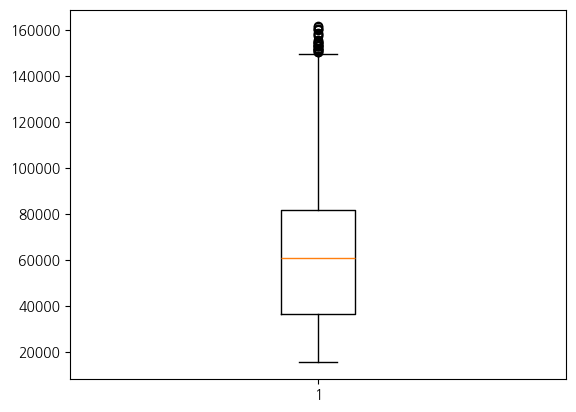

In [ ]:
plt.boxplot(df["salary_usd"])

## 5) 파생 변수 생성

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   job_id                              5000 non-null   object 
 1   posting_year                        5000 non-null   int64  
 2   country                             5000 non-null   object 
 3   region                              5000 non-null   object 
 4   city                                5000 non-null   object 
 5   company_name                        5000 non-null   object 
 6   company_size                        5000 non-null   object 
 7   industry                            5000 non-null   object 
 8   job_title                           5000 non-null   object 
 9   seniority_level                     5000 non-null   object 
 10  ai_mentioned                        5000 non-null   bool   
 11  ai_keywords                         5000 no

In [ ]:
df["salary_change_usd"] = df["salary_usd"] / (1+df["salary_change_vs_prev_year_percent"]/100)

In [ ]:
# job_data = job_data.drop(columns=["salay_change_usd"])

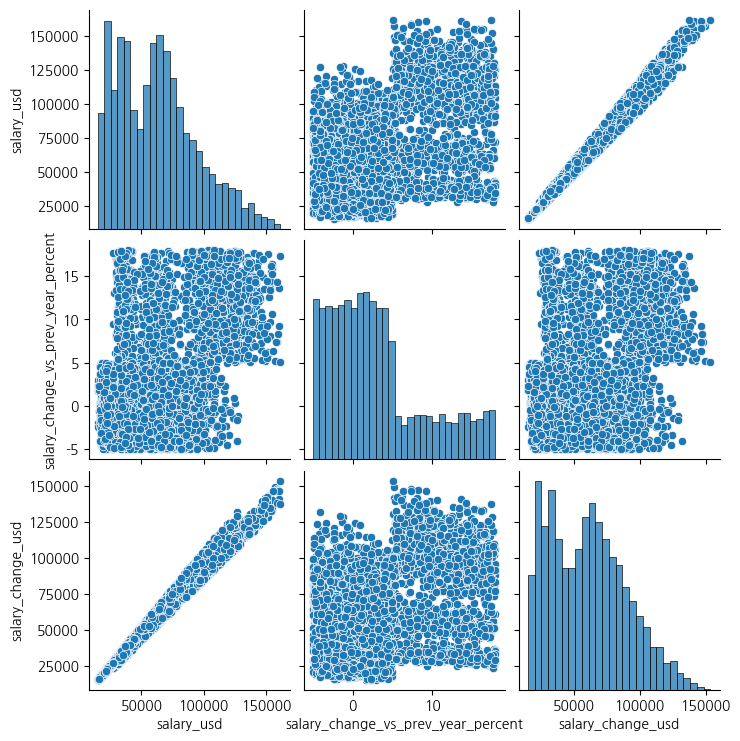

In [ ]:
sns.pairplot(
    df[["salary_usd", "salary_change_vs_prev_year_percent", "salary_change_usd"]],
    diag_kind="hist"
)

## 6) 전처리 데이터 저장

In [ ]:
df.to_csv(
    "./data/ai_impact_jobs_2010_2025_preprocessing.csv",
    index=False
)

# 3. 데이터 탐색하기

In [ ]:
import pandas as pd
jd = pd.read_csv(
    "./data/ai_impact_jobs_2010_2025_preprocessing.csv",
)
jd.head(2)

,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,ai_mentioned,ai_keywords,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage,salary_change_usd
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,London,NextGen Technologies,Small,Education,Policy Analyst,Lead,True,reinforcement learning,0.81,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,0.11,True,Low,14,Growing,54655.662052
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Singapore,Future Solutions,Medium,Energy,Data Scientist,Executive,False,NaN,0.04,"Research, SQL, Business Analysis, Python, Clou...",NaN,62045,-3.98,0.71,False,High,19,Emerging,64616.746511


## 3-1) 컬럼 탐색하기

### 3-1-1. 변수별로 특징 파악하기

In [ ]:
jd.head(2)

,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,ai_mentioned,ai_keywords,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage,salary_change_usd
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,London,NextGen Technologies,Small,Education,Policy Analyst,Lead,True,reinforcement learning,0.81,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,0.11,True,Low,14,Growing,54655.662052
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Singapore,Future Solutions,Medium,Energy,Data Scientist,Executive,False,NaN,0.04,"Research, SQL, Business Analysis, Python, Clou...",NaN,62045,-3.98,0.71,False,High,19,Emerging,64616.746511


In [ ]:
# Count and rank clusters by frequency
jd['job_description_embedding_cluster'].value_counts().sort_values(ascending=False)

job_description_embedding_cluster
11    284
12    278
16    277
2     268
1     262
15    261
13    258
8     257
4     256
10    253
0     252
19    247
9     242
3     237
7     236
17    229
5     229
6     227
18    226
14    221
Name: count, dtype: int64

In [ ]:
# Count jobs per AI adoption stage
jd['industry_ai_adoption_stage'].value_counts()


industry_ai_adoption_stage
Growing     2502
Emerging    2196
Mature       302
Name: count, dtype: int64

Text(0.5, 0, '연봉')

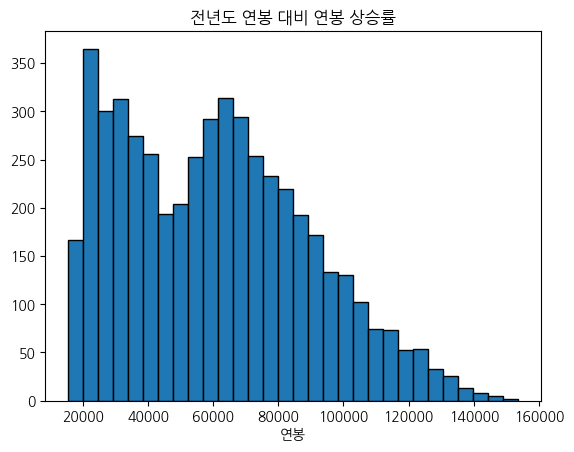

In [ ]:
plt.hist(df["salary_change_usd"], bins=30, edgecolor="black")
plt.title("전년도 연봉 대비 연봉 상승률")
plt.xlabel("연봉")

In [ ]:
# Count and rank clusters by frequency
df['job_description_embedding_cluster'].value_counts().sort_values(ascending=False)

job_description_embedding_cluster
11    284
12    278
16    277
2     268
1     262
15    261
13    258
8     257
4     256
10    253
0     252
19    247
9     242
3     237
7     236
17    229
5     229
6     227
18    226
14    221
Name: count, dtype: int64

In [ ]:
# Count jobs per AI adoption stage
df['industry_ai_adoption_stage'].value_counts()

industry_ai_adoption_stage
Growing     2502
Emerging    2196
Mature       302
Name: count, dtype: int64

In [ ]:
# Count displacement risk levels
df['ai_job_displacement_risk'].value_counts()

ai_job_displacement_risk
Low       1718
Medium    1655
High      1627
Name: count, dtype: int64

In [ ]:
# Count reskilling requirement levels
df['reskilling_required'].value_counts()

reskilling_required
False    3377
True     1623
Name: count, dtype: int64

In [ ]:
# Top 40 most common AI skills
df['ai_skills'].value_counts().head(40)

ai_skills
                                            3377
deep learning                                 72
NLP                                           64
machine learning                              61
reinforcement learning                        60
MLOps                                         54
computer vision                               48
generative AI                                 38
LLMs                                          33
NLP, MLOps                                    14
reinforcement learning, MLOps                 13
deep learning, MLOps                          13
reinforcement learning, deep learning         13
computer vision, MLOps                        11
machine learning, NLP                         11
deep learning, machine learning               10
computer vision, NLP                          10
MLOps, reinforcement learning                 10
NLP, computer vision                          10
deep learning, NLP                            10
reinforcem

In [ ]:
# Count core skill frequencies
df['core_skills'].value_counts()

core_skills
SQL, Project Management, Research                                                         8
SQL, Research, Software Engineering                                                       7
Python, Project Management, Statistics                                                    6
Communication, Research, Project Management                                               6
Statistics, Software Engineering, SQL                                                     6
                                                                                         ..
Communication, Cloud Computing, Python, Data Analysis, SQL                                1
Cloud Computing, Data Analysis, Project Management                                        1
Software Engineering, Communication, Project Management, SQL, Research                    1
Project Management, Data Analysis, Business Analysis, SQL, Research                       1
SQL, Research, Cloud Computing, Communication, Software Engineering,

In [ ]:
# Count AI keyword occurrences
df['ai_keywords'].value_counts()

ai_keywords
                                                               3377
deep learning                                                    72
NLP                                                              64
machine learning                                                 61
reinforcement learning                                           60
                                                               ... 
computer vision, MLOps, machine learning, NLP                     1
generative AI, reinforcement learning, LLMs, NLP                  1
computer vision, LLMs, machine learning                           1
reinforcement learning, MLOps, LLMs                               1
NLP, generative AI, reinforcement learning, computer vision       1
Name: count, Length: 618, dtype: int64

In [ ]:
# Rank seniority levels by frequency
df['seniority_level'].value_counts().sort_values(ascending=False)

seniority_level
Executive    856
Senior       849
Lead         844
Junior       837
Mid          818
Intern       796
Name: count, dtype: int64

In [ ]:
# Rank job titles by frequency
df['job_title'].value_counts().sort_values(ascending=False)

job_title
ML Engineer           558
Operations Manager    525
Research Scientist    520
AI Researcher         512
Systems Engineer      505
Software Engineer     492
Data Scientist        486
Policy Analyst        482
Business Analyst      480
Product Manager       440
Name: count, dtype: int64

In [ ]:
# Rank industries by frequency
df['industry'].value_counts().sort_values(ascending=False)

industry
Tech             579
Manufacturing    573
Agriculture      569
Retail           567
Healthcare       560
Finance          549
Government       546
Education        535
Energy           522
Name: count, dtype: int64

In [ ]:
# Rank company sizes by frequency
df['company_size'].value_counts().sort_values(ascending=False)

company_size
Small         1031
Medium         998
Startup        994
Large          993
Enterprise     984
Name: count, dtype: int64

In [ ]:
# Rank companies by job postings
df['company_name'].value_counts().sort_values(ascending=False)

company_name
Prime Systems           331
Future Systems          330
Future Solutions        322
Future Analytics        319
Prime Analytics         317
NextGen Solutions       317
Future Technologies     315
Prime Technologies      312
Prime Solutions         310
Global Technologies     310
NextGen Systems         309
NextGen Technologies    308
Global Analytics        303
Global Solutions        302
NextGen Analytics       300
Global Systems          295
Name: count, dtype: int64

In [ ]:
# Rank cities by job postings
df['city'].value_counts().sort_values(ascending=False)

city
Toronto      390
Lagos        378
Seoul        377
Bangalore    376
London       371
Berlin       370
Nairobi      356
Tokyo        353
Sao Paulo    352
New York     348
Paris        346
Singapore    341
Dubai        330
Sydney       312
Name: count, dtype: int64

In [ ]:
# Rank regions by job postings
df['region'].value_counts().sort_values(ascending=False)

region
South America     601
North America     585
East Asia         564
Europe            555
Southeast Asia    549
Middle East       541
South Asia        540
Oceania           536
Africa            529
Name: count, dtype: int64

In [ ]:
# Rank countries by job postings
df['country'].value_counts().sort_values(ascending=False)

country
Australia         281
New Zealand       255
United States     207
Mexico            193
Canada            185
Taiwan            159
Japan             138
China             137
Colombia          135
South Korea       130
Argentina         128
Saudi Arabia      125
Chile             119
Brazil            119
Sri Lanka         117
UAE               117
Pakistan          115
Nepal             112
Israel            106
Qatar             104
Egypt             101
Malaysia          101
Peru              100
India              99
Bangladesh         97
Vietnam            97
Philippines        97
Ghana              93
Jordan             89
Kenya              88
Indonesia          87
Nigeria            87
Thailand           84
Singapore          83
United Kingdom     80
South Africa       80
Morocco            80
Sweden             77
Netherlands        75
France             72
Italy              66
Germany            65
Poland             62
Spain              58
Name: count, dtype: int6

In [ ]:
# Rank years by job postings
df['posting_year'].value_counts().sort_values(ascending=False)

posting_year
2019    331
2025    327
2010    327
2013    326
2023    319
2014    316
2024    315
2022    312
2015    312
2016    311
2012    310
2021    309
2017    305
2020    304
2011    294
2018    282
Name: count, dtype: int64

In [ ]:
# Most common AI keywords
df['ai_keywords'].value_counts().head()

ai_keywords
                          3377
deep learning               72
NLP                         64
machine learning            61
reinforcement learning      60
Name: count, dtype: int64

In [ ]:
# Most common AI skills
df['ai_skills'].value_counts().head()

ai_skills
                          3377
deep learning               72
NLP                         64
machine learning            61
reinforcement learning      60
Name: count, dtype: int64

In [ ]:
# Filter rows where both columns have values
df[df[['ai_keywords', 'ai_skills']].notna().all(axis=1)][['ai_keywords', 'ai_skills']]

,ai_keywords,ai_skills
0,reinforcement learning,reinforcement learning
1,,
2,,
3,,
4,,
...,...,...
4995,,
4996,,
4997,,
4998,"computer vision, MLOps","computer vision, MLOps"


In [ ]:
# Columns contain the same information — drop one to avoid redundancy

In [ ]:
# Drop duplicate AI keywords column
df = df.drop(columns='ai_keywords')

In [ ]:
# View unique cities
df['city'].unique()

array(['London', 'Singapore', 'Sydney', 'Nairobi', 'Paris', 'Bangalore',
       'Seoul', 'Tokyo', 'New York', 'Berlin', 'Toronto', 'Lagos',
       'Dubai', 'Sao Paulo'], dtype=object)

In [ ]:
# View unique countries
df['country'].unique()

array(['Brazil', 'UAE', 'Nepal', 'Spain', 'Taiwan', 'Colombia', 'Jordan',
       'Peru', 'India', 'Sri Lanka', 'Australia', 'New Zealand', 'China',
       'Netherlands', 'Pakistan', 'Kenya', 'Mexico', 'Germany',
       'Indonesia', 'Argentina', 'Israel', 'Vietnam', 'Italy',
       'Singapore', 'Egypt', 'South Korea', 'Canada', 'Japan',
       'Bangladesh', 'Chile', 'Thailand', 'United States', 'France',
       'South Africa', 'Ghana', 'Poland', 'Qatar', 'Morocco', 'Sweden',
       'Philippines', 'United Kingdom', 'Nigeria', 'Saudi Arabia',
       'Malaysia'], dtype=object)

In [ ]:
# Some countries lack city data due to fewer city entri

In [ ]:
# Drop city column
df = df.drop(columns='city')

In [ ]:
# Count duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# Count missing values per column
df.isnull().sum()

job_id                                0
posting_year                          0
country                               0
region                                0
company_name                          0
company_size                          0
industry                              0
job_title                             0
seniority_level                       0
ai_mentioned                          0
ai_intensity_score                    0
core_skills                           0
ai_skills                             0
salary_usd                            0
salary_change_vs_prev_year_percent    0
automation_risk_score                 0
reskilling_required                   0
ai_job_displacement_risk              0
job_description_embedding_cluster     0
industry_ai_adoption_stage            0
salary_change_usd                     0
dtype: int64

In [ ]:
# Convert boolean to binary
df['ai_mentioned'] = df['ai_mentioned'].map({True: 1, False: 0})
df['reskilling_required'] = df['reskilling_required'].map({True: 1, False: 0})

In [ ]:
# Convert risk score to percentage
df['automation_risk_score'] = df['automation_risk_score'] * 100

In [ ]:
# Convert reskilling required to percentage
df['reskilling_required'] = df['reskilling_required'] * 100

In [ ]:
# Convert ai intensity score to percentage
df['ai_intensity_score'] = df['ai_intensity_score'] * 100

In [ ]:
# Pivot: AI mentions by year and industry
pivot1 = pd.pivot_table(data=df, index='posting_year', columns='industry', values='ai_mentioned', aggfunc='sum')
pivot1

industry,Agriculture,Education,Energy,Finance,Government,Healthcare,Manufacturing,Retail,Tech
posting_year,,,,,,,,,
2010,1,1,3,7,5,2,3,2,10
2011,0,1,2,8,1,2,4,3,8
2012,0,1,4,2,2,2,2,5,6
2013,4,2,1,8,0,1,4,4,7
2014,4,5,7,12,4,5,5,3,14
2015,4,3,3,11,5,6,5,7,9
2016,2,3,5,9,2,5,2,5,9
2017,2,5,5,16,5,5,2,4,9
2018,15,9,11,13,10,8,8,15,16


In [ ]:
# Total AI mentions per industry (sorted)
pivot2 = pd.pivot_table(data=df, index='industry', values='ai_mentioned', aggfunc='sum')
pivot2 = pivot2.sort_values(by='ai_mentioned', ascending=False)
pivot2

,ai_mentioned
industry,
Tech,260
Finance,254
Retail,175
Manufacturing,163
Education,162
Agriculture,154
Government,154
Healthcare,151
Energy,150


In [ ]:
# Total AI mentions per year
pivot3 = pd.pivot_table(data=df, index='posting_year', values='ai_mentioned', aggfunc='sum')
pivot3

,ai_mentioned
posting_year,
2010,34
2011,29
2012,24
2013,31
2014,59
2015,53
2016,42
2017,53
2018,105


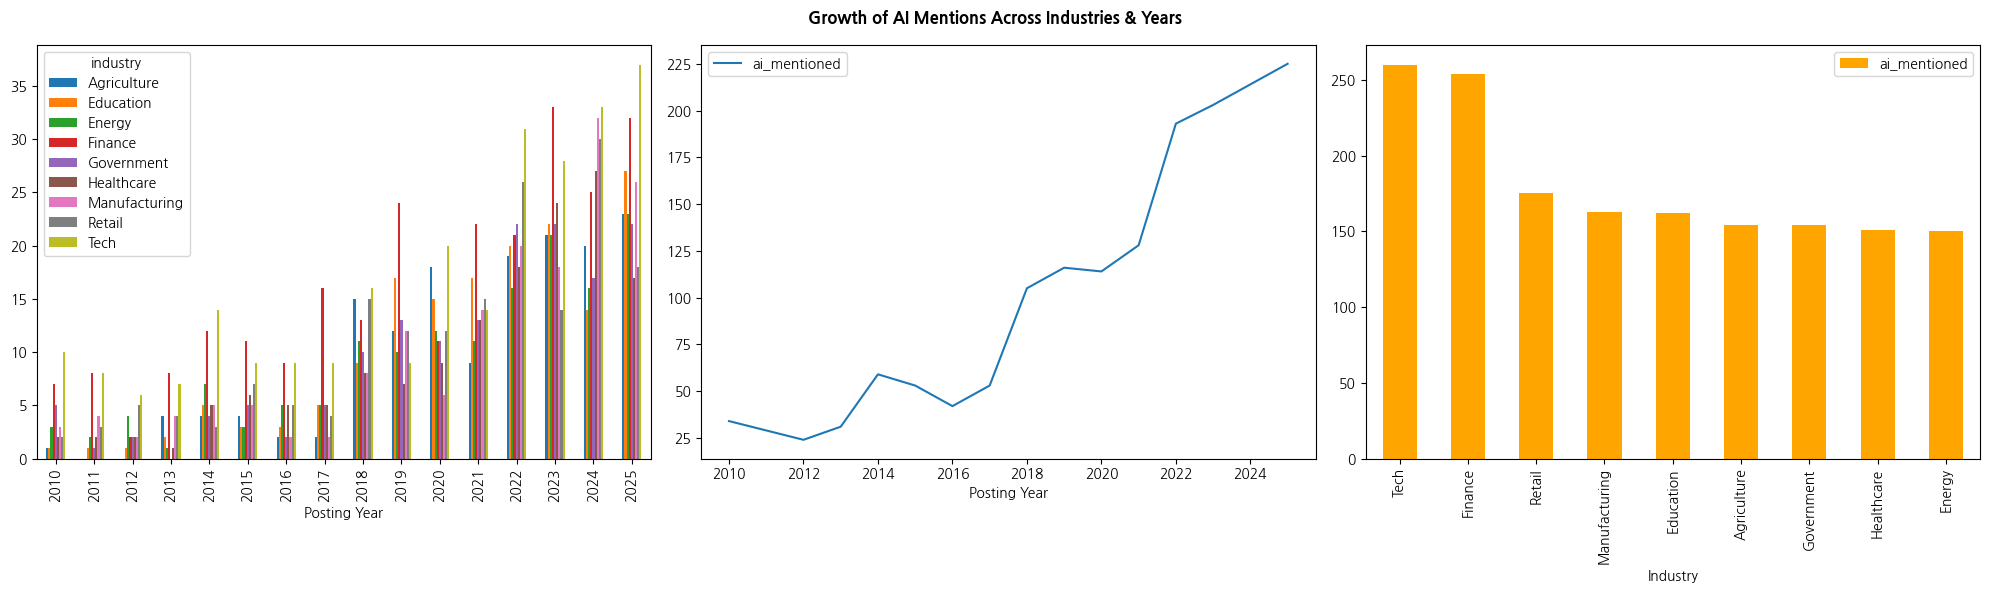

In [ ]:
# Create three plots showing AI mention trends
figure, axes = plt.subplots(1, 3, figsize=(20, 6))
pivot1.plot(kind='bar', ax=axes[0])
pivot3.plot(kind='line', ax=axes[1])
pivot2.plot(kind='bar', ax=axes[2], color='orange')
axes[0].set_xlabel('Posting Year')
axes[1].set_xlabel('Posting Year')
axes[2].set_xlabel('Industry')

plt.suptitle('Growth of AI Mentions Across Industries & Years', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Average AI mentions by region and industry
pivot4 = pd.pivot_table(data=df, index='region', columns = 'industry', values='ai_mentioned', aggfunc='mean')
pivot4

industry,Agriculture,Education,Energy,Finance,Government,Healthcare,Manufacturing,Retail,Tech
region,,,,,,,,,
Africa,0.272727,0.359375,0.265306,0.414286,0.297872,0.229508,0.245902,0.306452,0.516667
East Asia,0.322034,0.306452,0.316667,0.380952,0.323944,0.220000,0.262295,0.346667,0.349206
Europe,0.222222,0.310345,0.292308,0.382979,0.298246,0.314286,0.241935,0.360656,0.412698
Middle East,0.215385,0.327273,0.271186,0.553571,0.298507,0.245614,0.318841,0.320755,0.366667
North America,0.250000,0.338983,0.312500,0.500000,0.311475,0.301370,0.273973,0.260870,0.518987
Oceania,0.327586,0.305085,0.245283,0.456140,0.295082,0.269841,0.316667,0.338462,0.416667
South America,0.380282,0.240741,0.224138,0.476190,0.229730,0.318182,0.322581,0.373333,0.410256
South Asia,0.200000,0.259259,0.267857,0.421053,0.271186,0.350877,0.238806,0.166667,0.533333
Southeast Asia,0.253968,0.271429,0.379310,0.564516,0.204082,0.158730,0.344828,0.271429,0.517857


Text(0.5, 1.0, 'Regional Differences in Average AI Mentions by Industry')

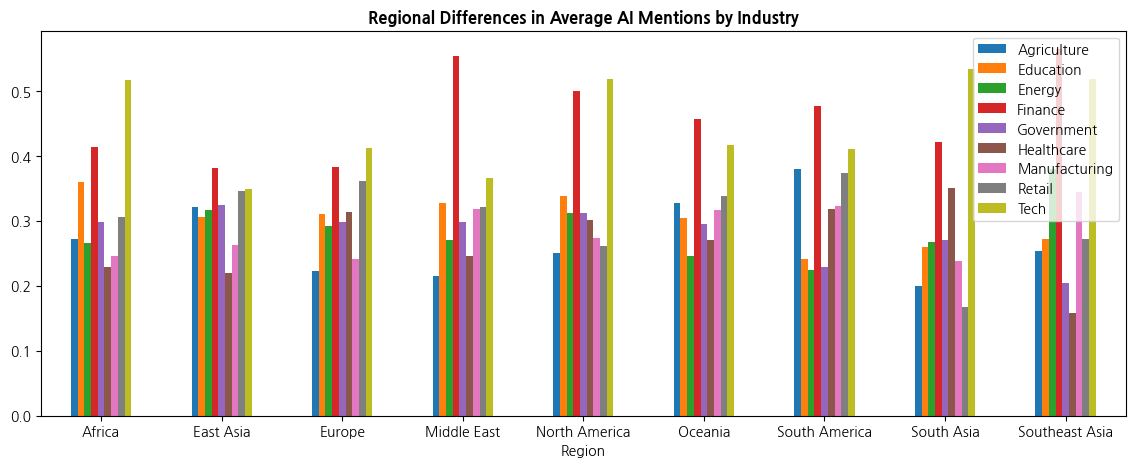

In [ ]:
# Bar chart of regional AI mention differences
pivot4.plot(kind='bar', figsize=(14, 5))
plt.xticks(rotation=360)
plt.legend(loc='upper right')
plt.xlabel('Region')
plt.title('Regional Differences in Average AI Mentions by Industry', fontweight='bold')

Text(0.5, 9.444444444444438, 'Salary (USD)')

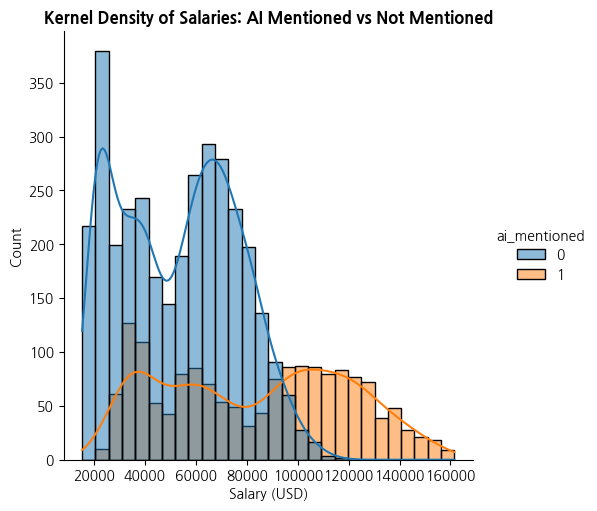

In [ ]:
# Salary distribution by AI mention
sns.displot(data=df, x='salary_usd', hue='ai_mentioned', kde=True)
plt.title('Kernel Density of Salaries: AI Mentioned vs Not Mentioned', fontweight='bold')
plt.xlabel('Salary (USD)')

Text(0, 0.5, 'Salary(USD)')

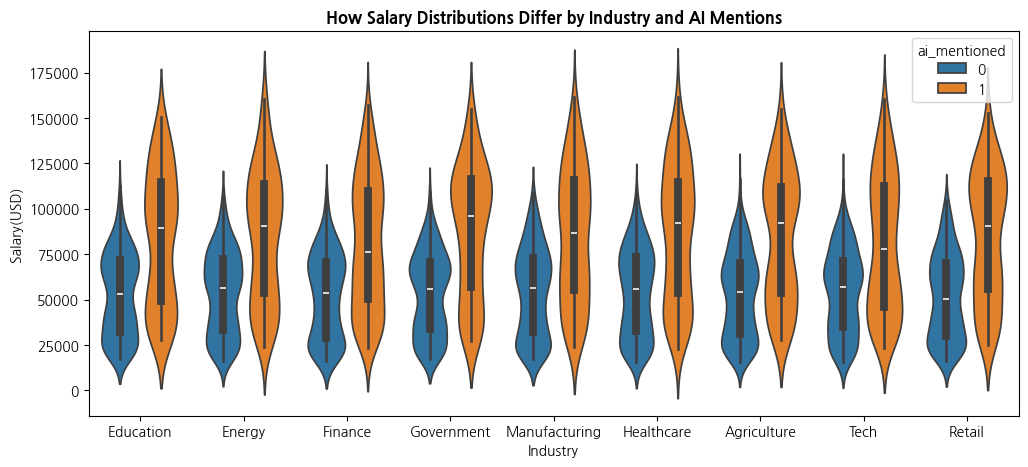

In [ ]:
# Salary spread by industry and AI mention
plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x='industry', y='salary_usd', hue='ai_mentioned')
plt.xlabel('Industry')
plt.title('How Salary Distributions Differ by Industry and AI Mentions', fontweight='bold')
plt.ylabel('Salary(USD)')

Text(0.5, 0.98, 'How Median Salaries Differ by Industry in AI vs Non-AI Jobs')

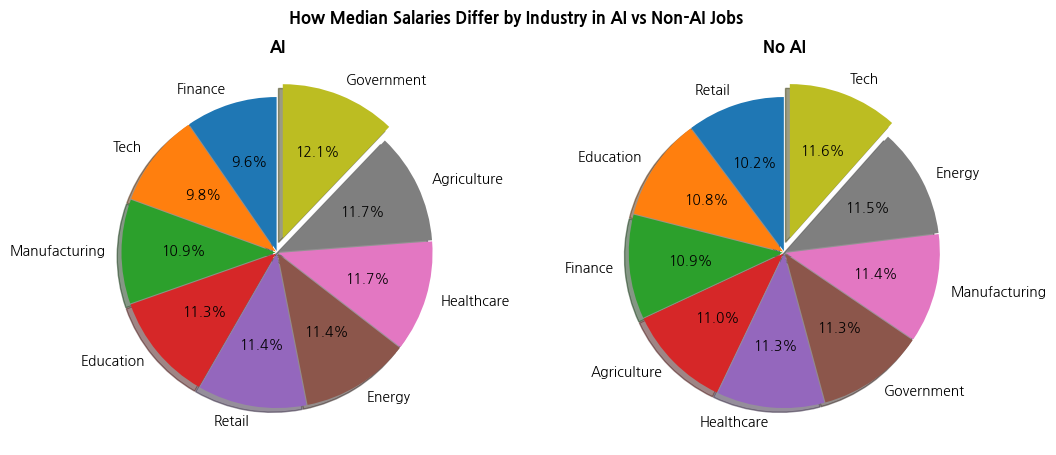

In [ ]:
# Compare median salaries by industry for AI vs non-AI jobs
behaviour1 = (df.groupby(['industry', 'ai_mentioned']).agg(median_salary=('salary_usd', 'median')).reset_index())
ai_highest_industry = behaviour1[behaviour1['ai_mentioned'] == 1]
ai_highest_industry = ai_highest_industry.sort_values(by='median_salary', ascending=True)
no_ai_highest_industry = behaviour1[behaviour1['ai_mentioned'] == 0]
no_ai_highest_industry = no_ai_highest_industry.sort_values(by='median_salary', ascending=True)
figure, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].pie(ai_highest_industry['median_salary'], labels=ai_highest_industry['industry'], autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1])
axes[0].set_title('AI', fontweight='bold')
axes[1].set_title('No AI', fontweight='bold')
axes[1].pie(no_ai_highest_industry['median_salary'], labels=no_ai_highest_industry['industry'], autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1])
plt.suptitle('How Median Salaries Differ by Industry in AI vs Non-AI Jobs', fontweight='bold')

Text(0.5, 0, 'Posting Year')

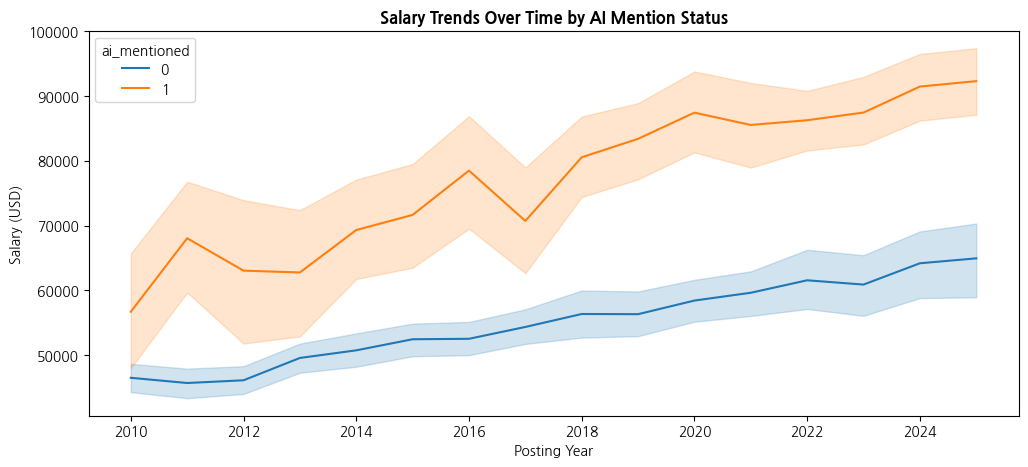

In [ ]:
# Salary trends over time by AI mention
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='posting_year', y='salary_usd', hue='ai_mentioned')
plt.title('Salary Trends Over Time by AI Mention Status', fontweight='bold')
plt.ylabel('Salary (USD)')
plt.xlabel('Posting Year')

Text(0, 0.5, 'Average Salary Change')

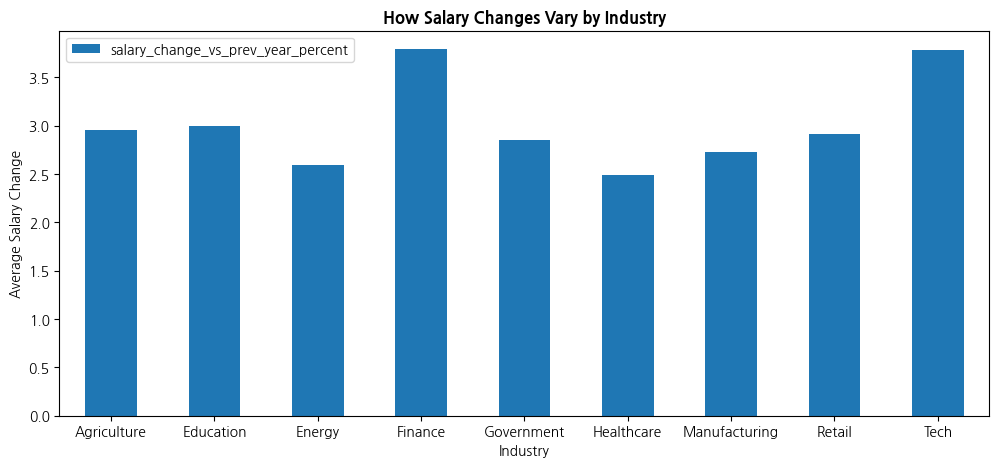

In [ ]:
# Average salary change by industry
group1 = (df.groupby('industry')['salary_change_vs_prev_year_percent'].mean().reset_index())
group1 = group1.set_index('industry')
group1.plot(kind='bar', figsize=(12,5))
plt.xticks(rotation=360)
plt.xlabel('Industry')
plt.title('How Salary Changes Vary by Industry', fontweight='bold')
plt.ylabel('Average Salary Change')

In [ ]:
# Top 8 AI skills for pie chart
pie1= (df['ai_skills'].value_counts().sort_values(ascending=False).head(8).reset_index(name='Counts'))
pie1

,ai_skills,Counts
0,,3377
1,deep learning,72
2,NLP,64
3,machine learning,61
4,reinforcement learning,60
5,MLOps,54
6,computer vision,48
7,generative AI,38


Text(0.5, 1.0, 'Key AI Skills Required in AI-Mentioned Jobs')

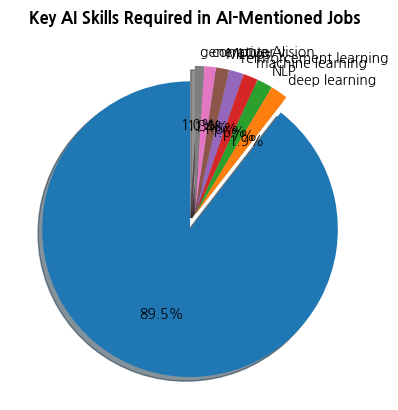

In [ ]:
# Pie chart of top AI skills
plt.pie(pie1['Counts'], labels=pie1['ai_skills'], shadow=True, autopct= '%1.1f%%', startangle=90, explode=[0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
plt.title('Key AI Skills Required in AI-Mentioned Jobs', fontweight='bold')

In [ ]:
# Count job listings by industry and title
group2 = (df.groupby(['industry', 'job_title']).agg(job_listings=('job_id', 'count')).reset_index())
group2

,industry,job_title,job_listings
0,Agriculture,AI Researcher,63
1,Agriculture,Business Analyst,54
2,Agriculture,Data Scientist,53
3,Agriculture,ML Engineer,65
4,Agriculture,Operations Manager,55
...,...,...,...
85,Tech,Policy Analyst,52
86,Tech,Product Manager,58
87,Tech,Research Scientist,65
88,Tech,Software Engineer,66


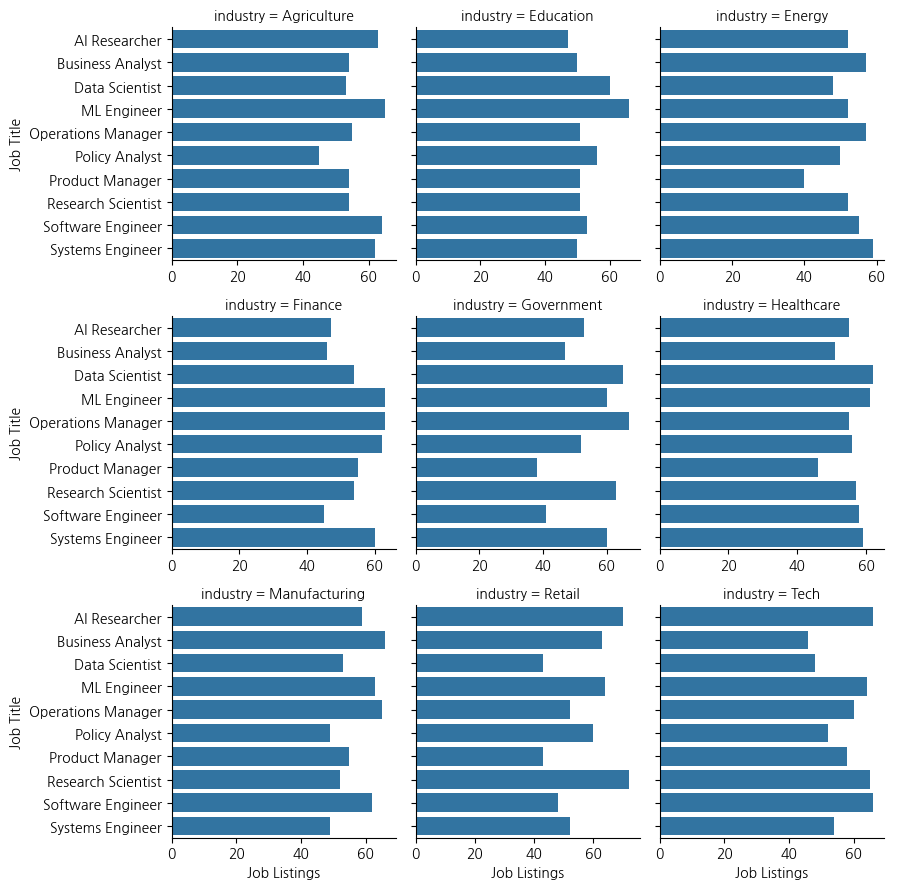

In [ ]:
# Top job titles per industry
cat = sns.catplot(
    data=group2,
    x='job_listings',
    y='job_title',
    col='industry',
    col_wrap=3,
    kind='bar',
    height=3,
    sharex=False
)
cat.set_axis_labels('Job Listings', 'Job Title')

# 3. 데이터 요약하기

# 4. 데이터 분석하기

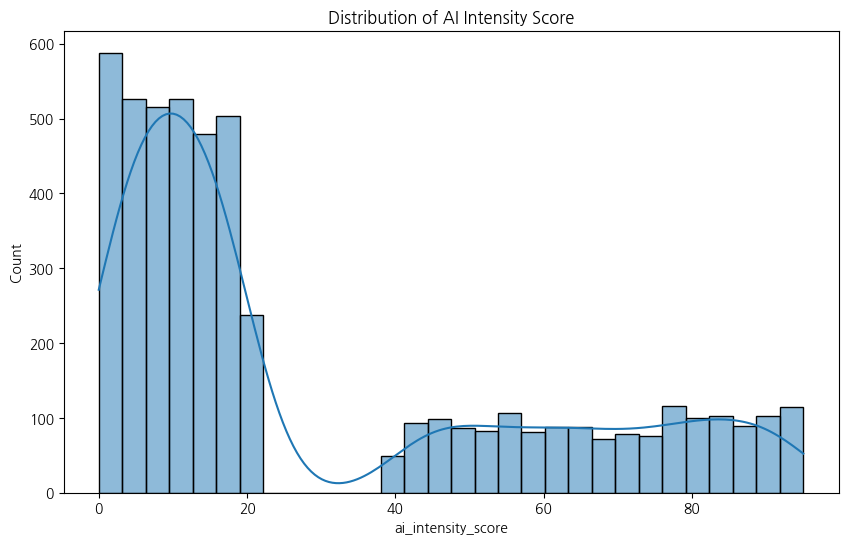

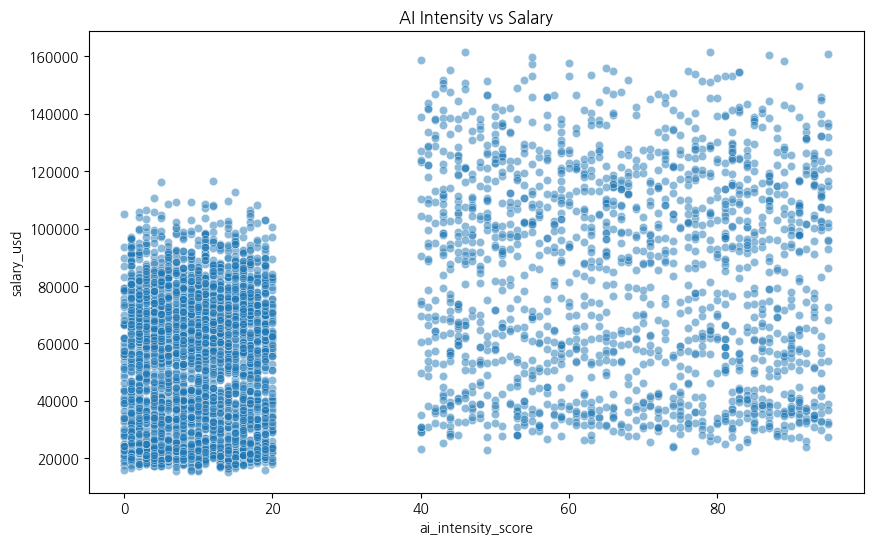

industry
Finance    36.570128
Tech       35.841105
Retail     27.975309
Name: ai_intensity_score, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. AI 밀집도 점수 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(df['ai_intensity_score'], bins=30, kde=True)
plt.title('Distribution of AI Intensity Score')
plt.show()

# 2. AI 밀집도와 연봉의 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ai_intensity_score', y='salary_usd', alpha=0.5)
plt.title('AI Intensity vs Salary')
plt.show()

# 3. 산업별 평균 AI 밀집도 상위 3개
top_industries = df.groupby('industry')['ai_intensity_score'].mean().sort_values(ascending=False).head(3)
print(top_industries)

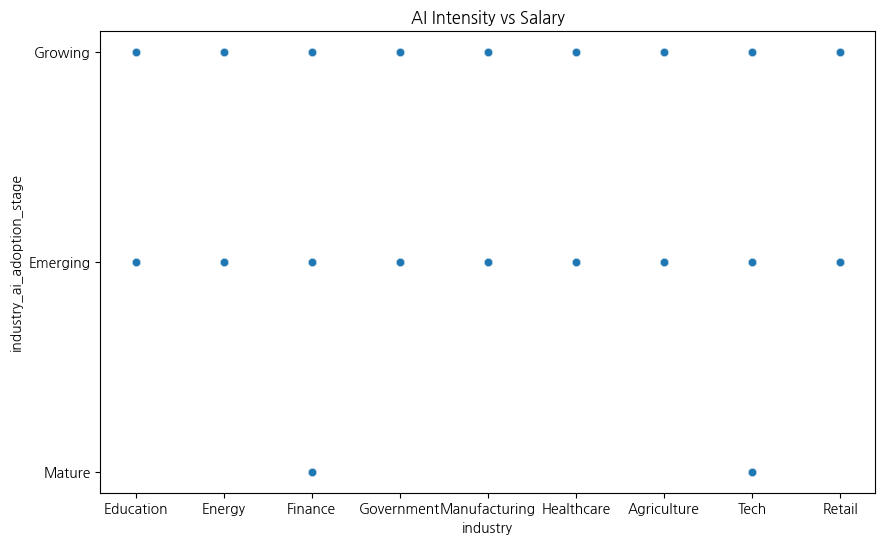

In [ ]:
df["industry_ai_adoption_stage"].unique()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='industry', y='industry_ai_adoption_stage', alpha=0.5)
plt.title('AI Intensity vs Salary')
plt.show()


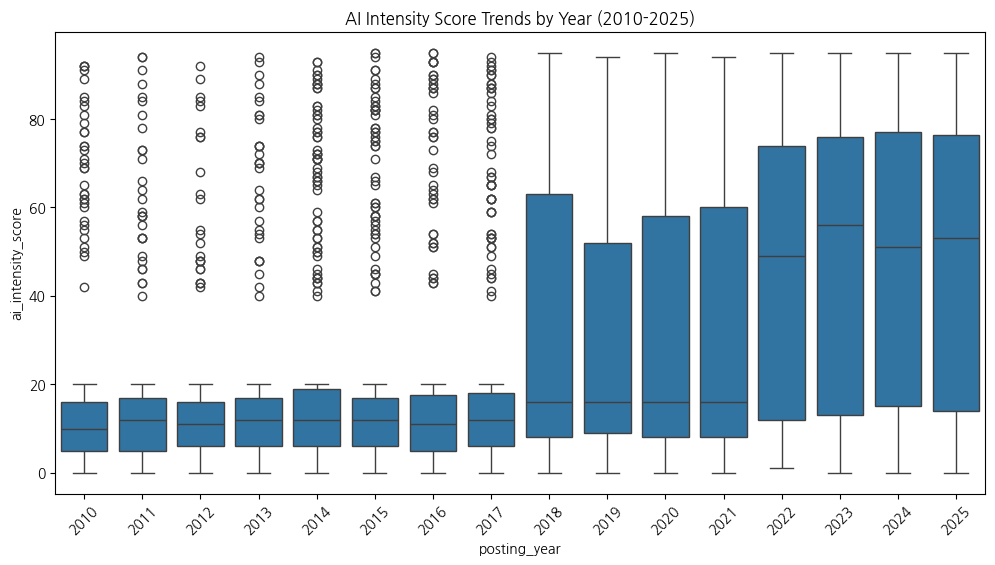

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 연도별 AI 밀집도 점수 변화 확인
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='posting_year', y='ai_intensity_score')
plt.title('AI Intensity Score Trends by Year (2010-2025)')
plt.xticks(rotation=45)
plt.show()

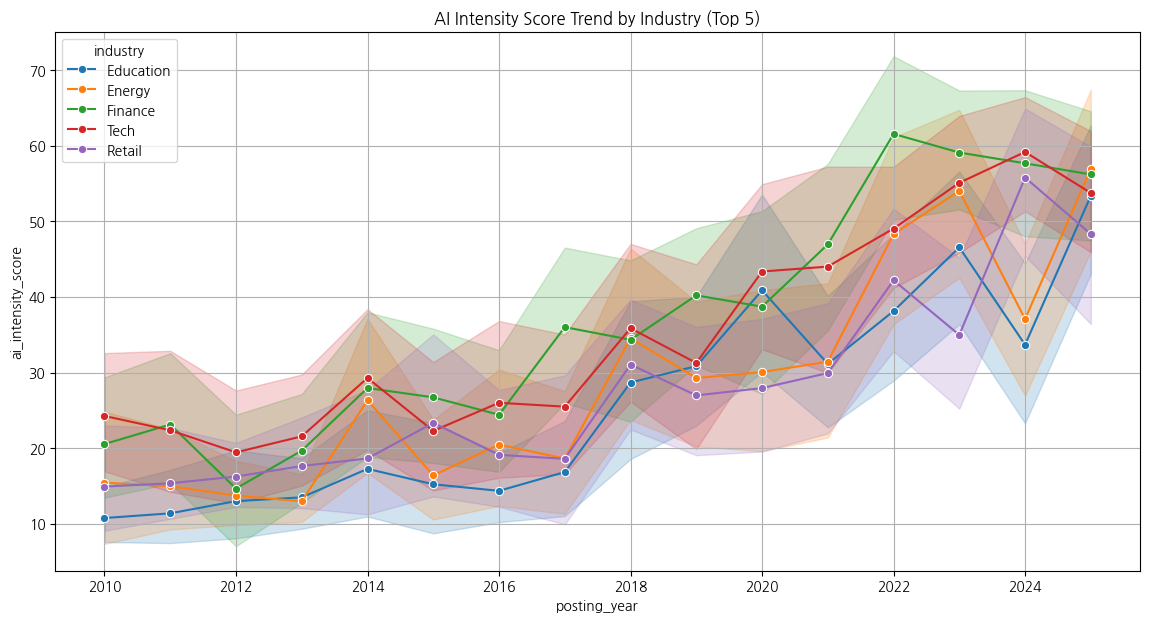

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 산업별 AI 밀집도 변화 (상위 5개 산업 예시)
top_5_industries = df.groupby('industry')['ai_intensity_score'].mean().nlargest(5).index
df_top = df[df['industry'].isin(top_5_industries)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top, x='posting_year', y='ai_intensity_score', hue='industry', marker='o')
plt.title('AI Intensity Score Trend by Industry (Top 5)')
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3392\430609773.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year = df.groupby('posting_year').apply(lambda x: x['ai_intensity_score'].corr(x['salary_usd']))


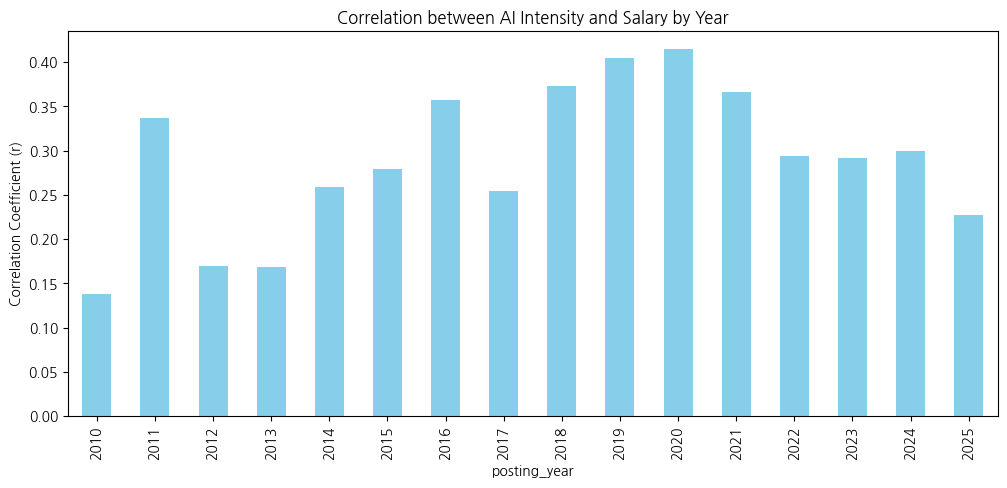

In [ ]:
# 2. 연봉과 AI 밀집도 상관계수 추이
correlation_by_year = df.groupby('posting_year').apply(lambda x: x['ai_intensity_score'].corr(x['salary_usd']))

plt.figure(figsize=(12, 5))
correlation_by_year.plot(kind='bar', color='skyblue')
plt.title('Correlation between AI Intensity and Salary by Year')
plt.ylabel('Correlation Coefficient (r)')
plt.show()

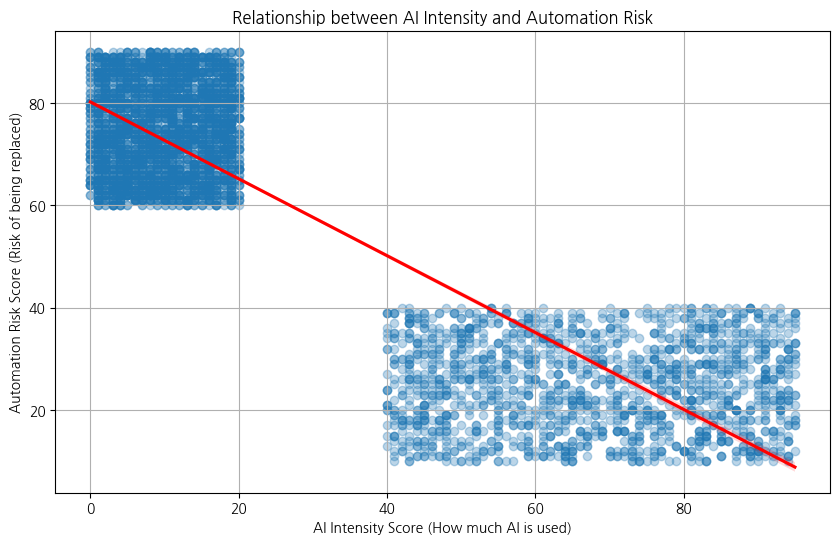

상관계수(r): -0.8751


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# AI 밀집도와 자동화 위험도의 관계 시각화
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='ai_intensity_score', y='automation_risk_score', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Relationship between AI Intensity and Automation Risk')
plt.xlabel('AI Intensity Score (How much AI is used)')
plt.ylabel('Automation Risk Score (Risk of being replaced)')
plt.grid(True)
plt.show()

# 상관계수 계산
correlation = df['ai_intensity_score'].corr(df['automation_risk_score'])
print(f"상관계수(r): {correlation:.4f}")